In [1]:
import numpy as np
from scipy import sparse
# 参数设置
m = 128
n = 256

# 生成高斯随机矩阵 A ∈ ℝ^{m×n}
A = np.random.randn(m, n)

# 生成稀疏信号 精确解u ∈ ℝ^n，稀疏度为 10%
sparsity = 0.1
# u = sparse.random(n, 1, density=sparsity, data_rvs=np.random.randn).toarray()#得到的是二维(n,1)，否则# A @ x 是 (m,) ，而 b 是 (m,1)，出现广播，cvxpy要报错
u = sparse.random(n, 1, density=sparsity, data_rvs=np.random.randn).toarray().flatten()  # 转为 (n,)

# 计算观测值 b = A @ u
b = A @ u

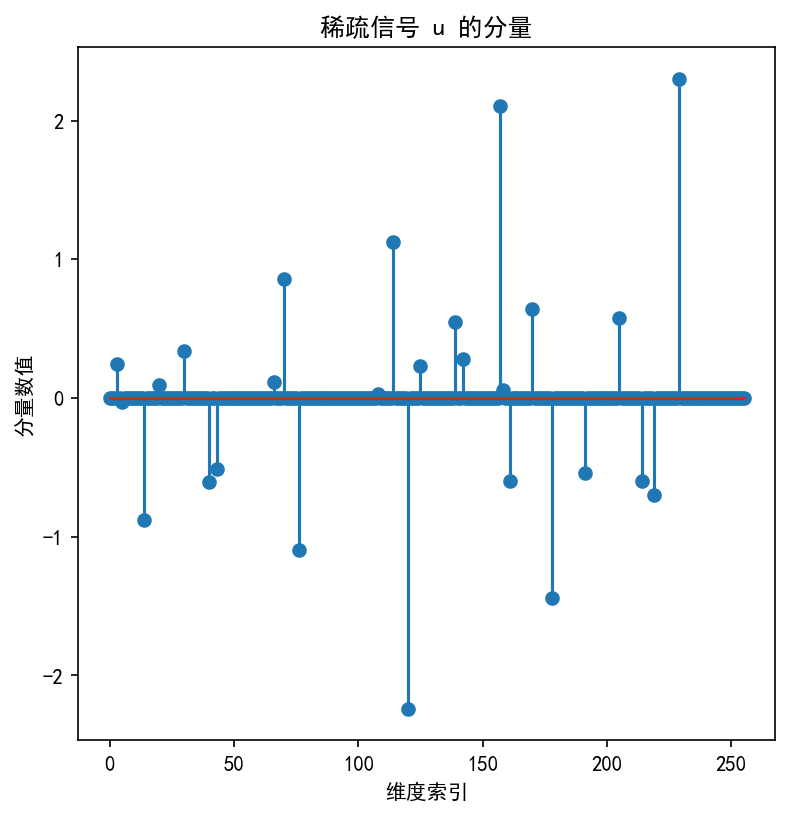

In [2]:
# 画图
import matplotlib.pyplot as plt
from matplotlib import rcParams
# 设置支持中文字体和负号正常显示
rcParams['font.sans-serif'] = ['SimHei']  # 指定黑体
rcParams['axes.unicode_minus'] = False    # 解决负号显示问题
plt.figure(figsize=(6, 6))
plt.stem(u)
plt.title("稀疏信号 u 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")

# 保存为 SVG 文件
plt.savefig("../images/01b-精确解u的分布.svg", format="svg")

plt.show()

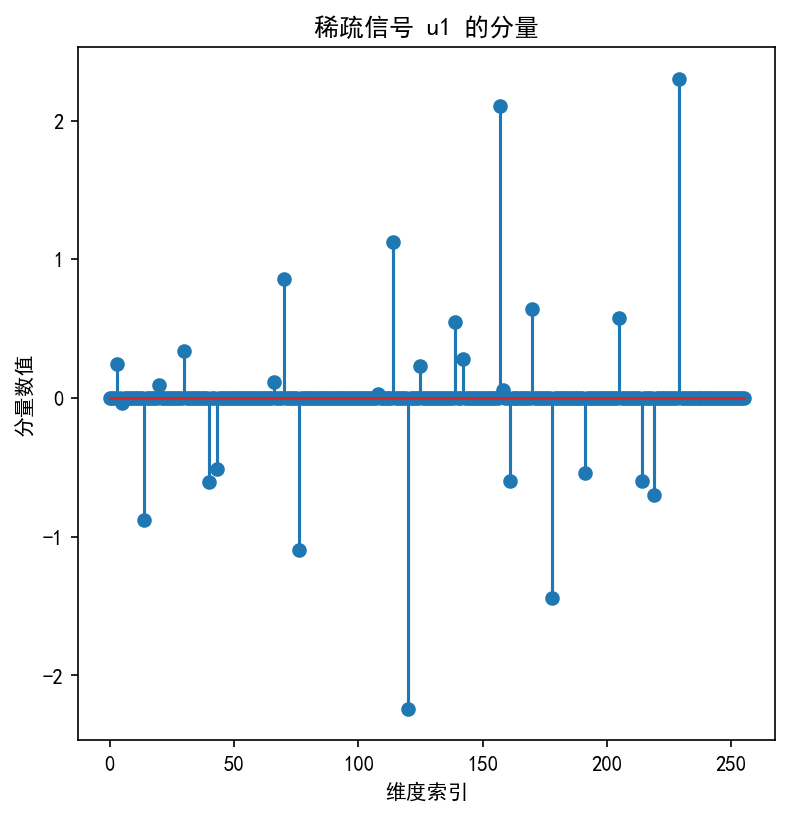

In [3]:
# 用cvxpy求解L1范数最小化
import cvxpy as cp
# 定义优化问题
x1 = cp.Variable(n)#定义一个优化变量 x ∈ ℝⁿ
objective = cp.Minimize(cp.norm(x1, 1))  # ℓ1范数
constraints = [A @ x1 == b]             # 约束条件，信号 x 应满足观测条件

# 求解
prob1 = cp.Problem(objective, constraints)
prob1.solve(solver=cp.SCS)
u1 = x1.value

# 画出恢复信号分布（非零部分）
plt.figure(figsize=(6, 6))
plt.stem(u1)
plt.title("稀疏信号 u1 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")
plt.savefig("../images/01c-l1范数下解u1的分布.svg", format="svg")


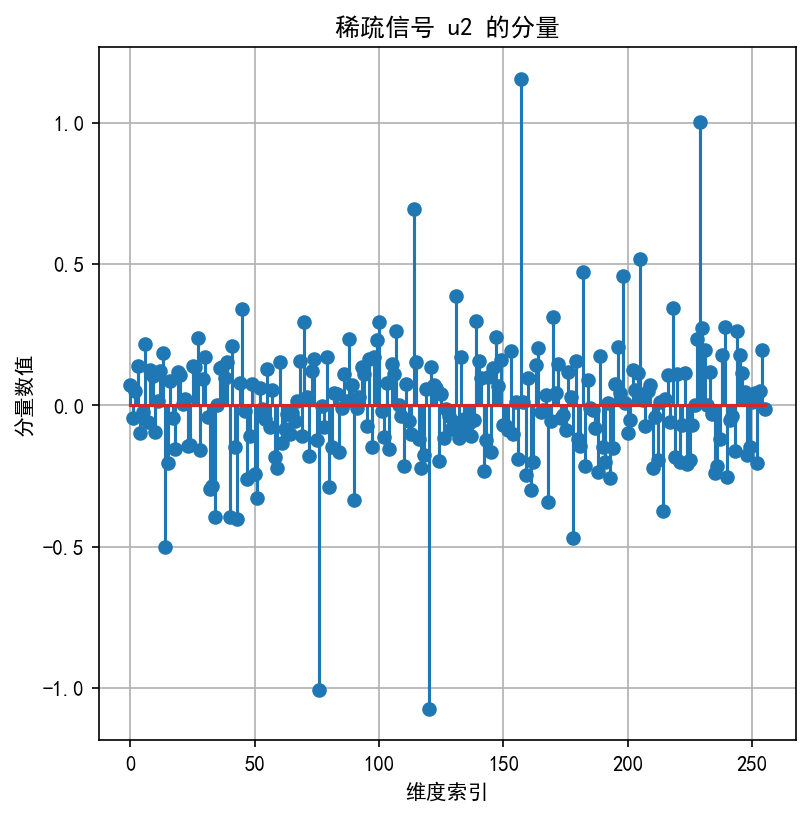

In [4]:
# 用cvxpy求解L2范数最小化
import cvxpy as cp
# 定义优化问题
x2 = cp.Variable(n)
objective = cp.Minimize(cp.norm(x2, 2))  # ℓ2范数
constraints = [A @ x2 == b]             # 约束条件

# 求解
prob = cp.Problem(objective, constraints)
prob.solve(solver=cp.SCS)
u2 = x2.value

# 画出恢复信号分布（非零部分）
plt.figure(figsize=(6, 6))
plt.stem(u2)
plt.title("稀疏信号 u2 的分量")
plt.xlabel("维度索引")
plt.ylabel("分量数值")
plt.grid(True)
plt.savefig("../images/01d-l2范数下解u2的分布.svg", format="svg")


In [1]:
#特征值、特征向量、几何重数和代数重数
import numpy as np
from numpy.linalg import matrix_rank
from collections import Counter

# 1. 构造一个 6x6 实对称矩阵（保证特征值实数）
np.random.seed(0)
A = np.random.randn(6, 6)
A = (A + A.T) / 2  # 对称化

# 2. 计算特征值和特征向量
eigvals, eigvecs = np.linalg.eig(A)

# 3. 对特征值做四舍五入处理，避免浮点数误差造成重复特征值不被识别
rounded_eigvals = np.round(eigvals, decimals=8)

# 4. 计算代数重数
algebraic_multiplicities = Counter(rounded_eigvals)

# 5. 计算几何重数
geometric_multiplicities = {}
for val in algebraic_multiplicities:
    nullity = 6 - matrix_rank(A - val * np.eye(6))
    geometric_multiplicities[val] = nullity

# 6. 输出结果
print("矩阵 A：\n", A)
print("\n特征值（带重数）：")
for val, count in algebraic_multiplicities.items():
    print(f"λ = {val:.4f}，代数重数 = {count}，几何重数 = {geometric_multiplicities[val]}")


矩阵 A：
 [[ 1.76405235  0.67512281  0.86988785  1.27698045  2.06865631 -0.41116523]
 [ 0.67512281 -0.15135721  0.00922808 -0.22174862 -0.65516105  0.91621801]
 [ 0.86988785  0.00922808  0.44386323 -1.10965774  0.7699188  -0.54647201]
 [ 1.27698045 -0.22174862 -1.10965774  0.6536186   0.33862617 -1.36148074]
 [ 2.06865631 -0.65516105  0.7699188   0.33862617  1.53277921  0.56072331]
 [-0.41116523  0.91621801 -0.54647201 -1.36148074  0.56072331  0.15634897]]

特征值（带重数）：
λ = 4.3270，代数重数 = 1，几何重数 = 0
λ = -1.6498，代数重数 = 1，几何重数 = 0
λ = -2.0968，代数重数 = 1，几何重数 = 0
λ = 0.5934，代数重数 = 1，几何重数 = 0
λ = 0.9933，代数重数 = 1，几何重数 = 0
λ = 2.2322，代数重数 = 1，几何重数 = 0
